IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib_inline

UsageError: Line magic function `%` not found.


LOADING DATASET

In [2]:
df = pd.read_csv("D:\coding\ML\DataSets\marketing_campaign.csv",sep= '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

EXPLORATORY DATA ANALYSIS

In [4]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [5]:
for i in df.columns:
    if df[i].isna().sum() >0:
        print(i)

Income


In [6]:
df['Dt_Customer'].dtype

dtype('O')

In [7]:
categorical_columns = []
numerical_columns = []

In [8]:
for column in df.columns:
    if df[column].dtype=='O':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [9]:
print(categorical_columns)
print("...numerical columns ...")
print(numerical_columns)

['Education', 'Marital_Status', 'Dt_Customer']
...numerical columns ...
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df['Age'] = 2022 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,41


In [13]:
data = df.drop('Year_Birth',axis=1)
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,65
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,68
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,57
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,38
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,41


In [14]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

In [15]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
numerical_columns.remove('Year_Birth')

In [17]:
for i in numerical_columns:
    if len(data[i].value_counts()) <=10:
        categorical_columns.append(i)
        numerical_columns.remove(i)

In [18]:
categorical_columns

['Education',
 'Marital_Status',
 'Dt_Customer',
 'Kidhome',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'AcceptedCmp2',
 'Z_CostContact',
 'Response']

In [19]:
numerical_columns.remove('ID')

In [20]:
categorical_columns.append('AcceptedCmp4')
categorical_columns.append('AcceptedCmp1')

In [21]:
numerical_columns.remove('AcceptedCmp4')
numerical_columns.remove('AcceptedCmp1')

C:\Users\91939\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91939\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91939\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

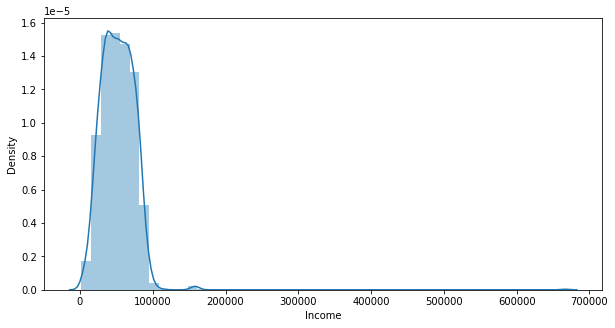

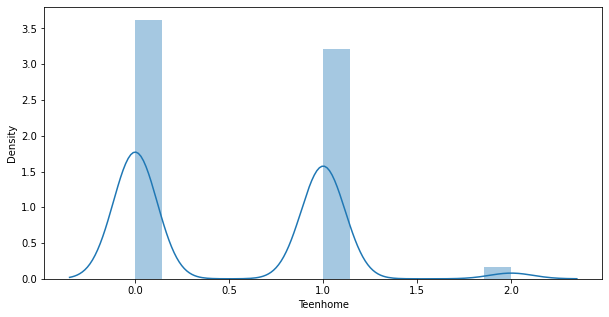

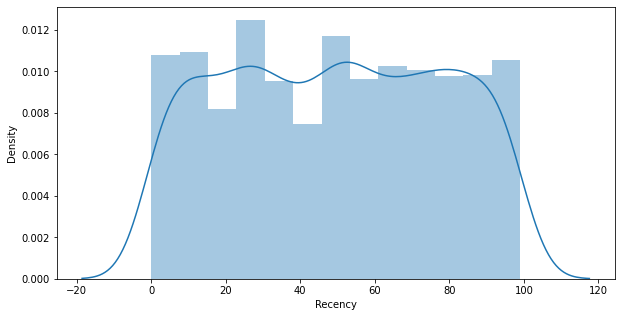

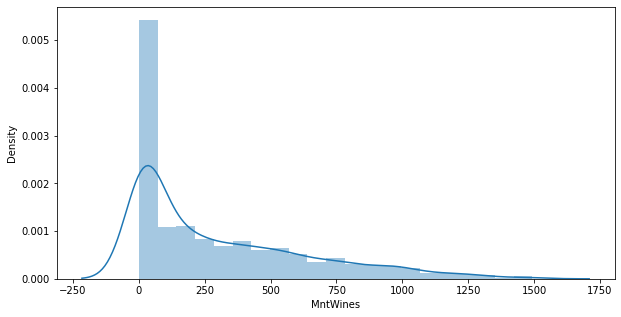

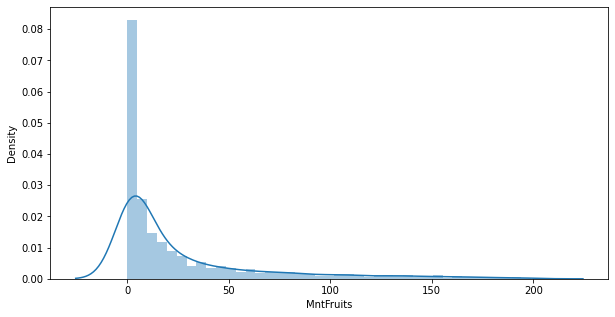

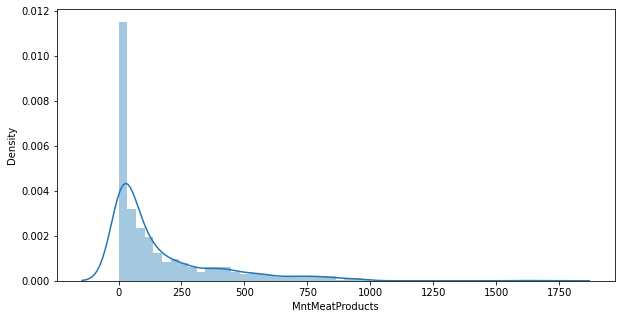

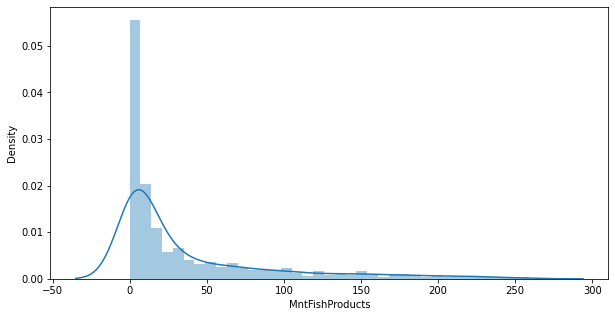

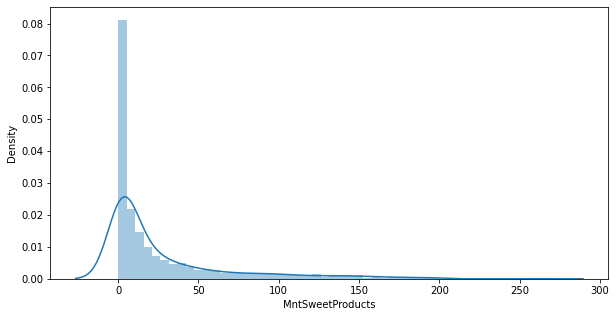

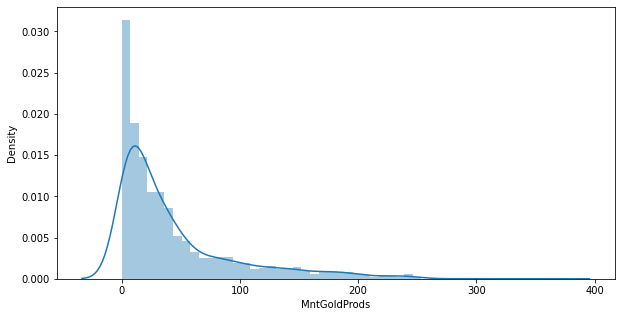

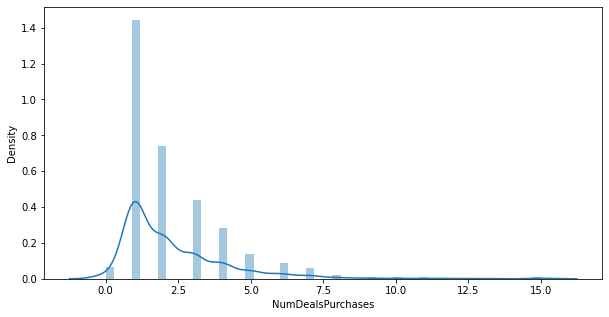

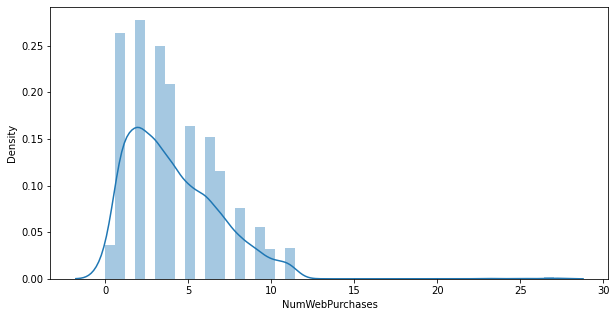

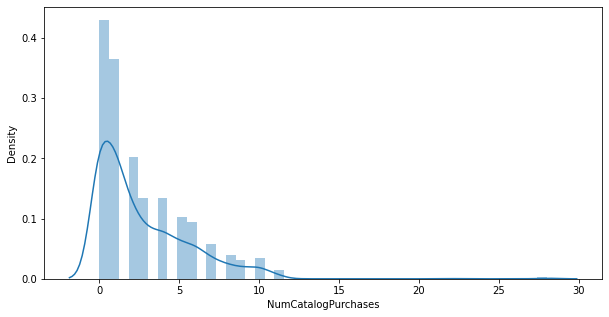

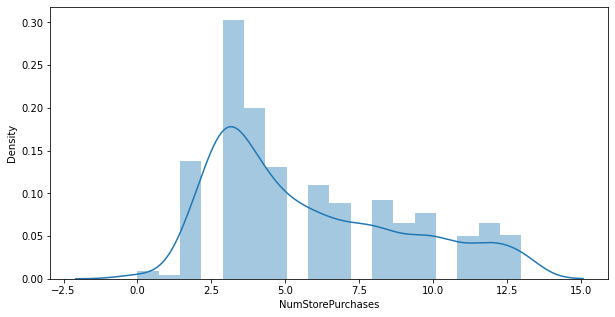

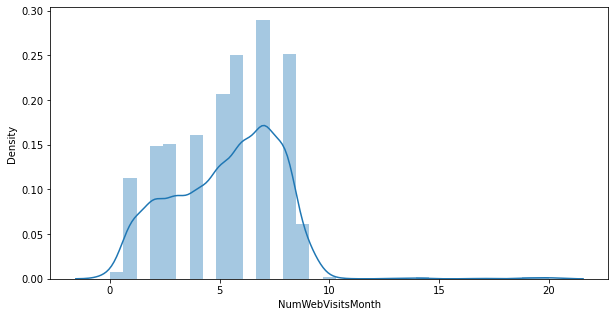

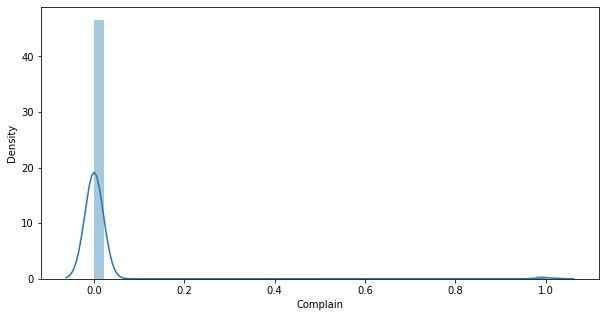

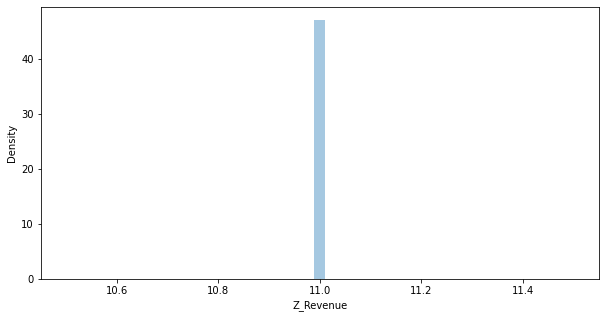

In [22]:
for i in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.distplot(data[i])

In [23]:
data.Z_Revenue.value_counts()
data.drop('Z_Revenue',axis=1,inplace=True)

In [24]:
data.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [25]:
categorical_columns.append('Complain')
numerical_columns.remove('Complain')

In [26]:
data.Teenhome.value_counts()
data.drop('ID',axis=1,inplace=True)

In [27]:
categorical_columns.append('Teenhome')
numerical_columns.remove('Teenhome')

In [28]:
print(numerical_columns)
print()
print()
print(categorical_columns)

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_Revenue']


['Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp2', 'Z_CostContact', 'Response', 'AcceptedCmp4', 'AcceptedCmp1', 'Complain', 'Teenhome']


In [29]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,7,0,0,0,0,0,0,3,1,65
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,5,0,0,0,0,0,0,3,0,68
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,4,0,0,0,0,0,0,3,0,57
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,6,0,0,0,0,0,0,3,0,38
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,5,0,0,0,0,0,0,3,0,41


In [30]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [31]:
data['customer_dt_year'] = 2022 - data['Dt_Customer'].dt.year

In [32]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Response,Age,customer_dt_year
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,0,0,3,1,65,10
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,0,3,0,68,8
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,3,0,57,9
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,0,3,0,38,8
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,3,0,41,8


In [33]:
data.customer_dt_year.value_counts()
categorical_columns.append('customer_dt_year')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Income               2240 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [35]:
print(numerical_columns)
print(categorical_columns)

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_Revenue']
['Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp2', 'Z_CostContact', 'Response', 'AcceptedCmp4', 'AcceptedCmp1', 'Complain', 'Teenhome', 'customer_dt_year']


In [36]:
numerical_columns.remove('Z_Revenue')

In [37]:
for i in numerical_columns:
    if 0 in data[i]:
        print(i)

Income
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth


In [38]:
data.drop('Dt_Customer',axis=1,inplace=True)

In [39]:
X = data.drop('Response',axis=1)
y = data['Response']

PREPROCESSING

In [40]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
categorical_columns.remove('Response')
categorical_columns.remove('Dt_Customer')

In [43]:
transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_columns)],remainder='passthrough')
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [44]:
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

CREATING MODEL

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [46]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [47]:
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.8883928571428571


In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       381
           1       0.72      0.42      0.53        67

    accuracy                           0.89       448
   macro avg       0.81      0.69      0.73       448
weighted avg       0.88      0.89      0.88       448



In [51]:
print(confusion_matrix(y_test,predictions))

[[370  11]
 [ 39  28]]


In [52]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Response,Age,customer_dt_year
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,1,65,10
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,0,68,8
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,0,57,9
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,0,38,8
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,0,41,8


In [56]:
numerical_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

SVC MODEL

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sam = scaler.fit_transform(X_train)
X_test_sam = scaler.transform(X_test)

In [59]:
from sklearn.svm import SVC

In [60]:
model = SVC(kernel='rbf',random_state=42)
model.fit(X_train_sam,y_train)

SVC(random_state=42)

In [61]:
predic = model.predict(X_test_sam)
print(accuracy_score(y_test,predic))

0.8705357142857143


In [62]:
pre = model.predict(X_train_sam)
print(accuracy_score(y_train,pre))

0.9557377049180328


In [63]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test,predic))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       381
           1       0.57      0.57      0.57        67

    accuracy                           0.87       448
   macro avg       0.75      0.75      0.75       448
weighted avg       0.87      0.87      0.87       448

[[352  29]
 [ 29  38]]


Random Forest Gives better result than SVC in this problem satatement